# cb.en.u4cse21450 s.harecharan

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('test.csv.csv')

In [33]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [34]:
df['Maternal Age'] = df['Maternal Age'].astype(int)

In [35]:
df_smokers = df[['Maternal Smoker','Maternal Age']]

In [36]:
smoker = df_smokers['Maternal Age'][df['Maternal Smoker'] == True]
smoker.head()

2     18
3     18
8     30
10    19
11    18
Name: Maternal Age, dtype: int32

In [37]:
non_smoker = df_smokers['Maternal Age'][df['Maternal Smoker'] == False]
non_smoker.head()

0    27
1    33
4    35
5    33
6    40
Name: Maternal Age, dtype: int32

Q1

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

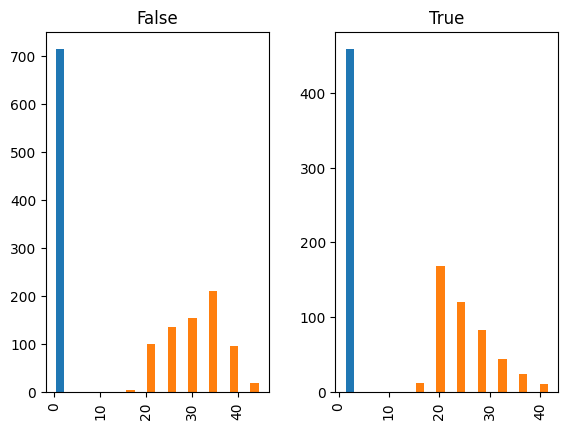

In [38]:
df_smokers.hist(by='Maternal Smoker',bins=10)

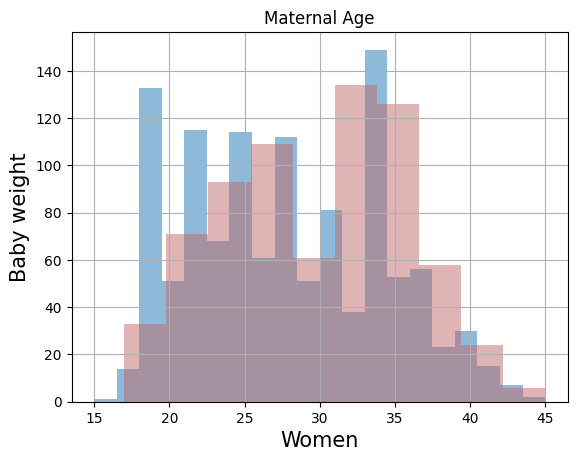

In [39]:
# import seaborn as sns
df_smokers.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Baby weight',fontsize=15)
plt.show()

Q2

The Hypotheses
Null hypothesis:the distribution of maternal age of mothers IS EQUAL TO  mothers who don't smoke as for mothers who do. 
The difference in the sample is due to chance. 
Alternative hypothesis: In the population, the mothers who don't smoke have lower age rather than the mothers who have higher age

In [40]:
means_table = df_smokers.groupby('Maternal Smoker').mean()


In [41]:
means_table

Maternal Age
Maternal Smoker              
False               29.686713
True                24.193900

In [42]:
observed_diff = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_diff

C:\Users\DELL\AppData\Local\Temp\ipykernel_21188\3975974441.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  observed_diff = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]


-5.4928135045782085

## RANDOM SAMPLING

### INITIAL SAMPLING WITH RANDOM SIZE 1

In [43]:
df_smokers

Maternal Smoker  Maternal Age
0               False            27
1               False            33
2                True            18
3                True            18
4               False            35
...               ...           ...
1169            False            27
1170            False            24
1171             True            30
1172            False            21
1173            False            38

[1174 rows x 2 columns]

In [44]:
shuffled = df_smokers.sample(replace=False, frac=1)

In [45]:
shuffled.head()

Maternal Smoker  Maternal Age
245            False            39
522            False            36
212            False            33
967            False            30
921            False            43

In [46]:
shuffled_age = shuffled['Maternal Age']
type(shuffled_age)

pandas.core.series.Series

In [47]:
original_and_shuffled = df_smokers.assign(shuffled_age=shuffled_age.values)
original_and_shuffled.head()

Maternal Smoker  Maternal Age  shuffled_age
0            False            27            39
1            False            33            36
2             True            18            33
3             True            18            30
4            False            35            43

In [48]:
all_grp_means = original_and_shuffled.groupby('Maternal Smoker').mean()
all_grp_means

Maternal Age  shuffled_age
Maternal Smoker                            
False               29.686713     27.535664
True                24.193900     27.544662

In [49]:
difference = all_grp_means['shuffled_age'][1] - all_grp_means['shuffled_age'][0]
difference

C:\Users\DELL\AppData\Local\Temp\ipykernel_21188\3675363139.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = all_grp_means['shuffled_age'][1] - all_grp_means['shuffled_age'][0]


0.008997973703856132

In [50]:
import array

In [51]:
differences = np.zeros(10000)

In [52]:
for i in range(10000):
    shuffled_age = df_smokers['Maternal Age'].sample(replace=False, frac=1).values
    original_and_shuffled = df_smokers.assign(shuffled_age=shuffled_age)
    grp_means = original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = grp_means['shuffled_age'][1] - grp_means['shuffled_age'][0]
    differences[i] = difference

C:\Users\DELL\AppData\Local\Temp\ipykernel_21188\2888155791.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = grp_means['shuffled_age'][1] - grp_means['shuffled_age'][0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_21188\2888155791.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = grp_means['shuffled_age'][1] - grp_means['shuffled_age'][0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_21188\2888155791.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

C:\Users\DELL\AppData\Local\Temp\ipykernel_21188\2888155791.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = grp_means['shuffled_age'][1] - grp_means['shuffled_age'][0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_21188\2888155791.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = grp_means['shuffled_age'][1] - grp_means['shuffled_age'][0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_21188\2888155791.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

In [53]:
differences

array([ 0.45257705, -0.50612612, -0.43100385, ...,  0.08412024,
       -0.07685604,  0.16997425])

In [54]:
difference_df = pd.DataFrame(differences)
difference_df.head()

0
0  0.452577
1 -0.506126
2 -0.431004
3  0.102006
4 -0.252141

In [55]:
difference_df

0
0     0.452577
1    -0.506126
2    -0.431004
3     0.102006
4    -0.252141
...        ...
9995  0.939083
9996  0.352414
9997  0.084120
9998 -0.076856
9999  0.169974

[10000 rows x 1 columns]

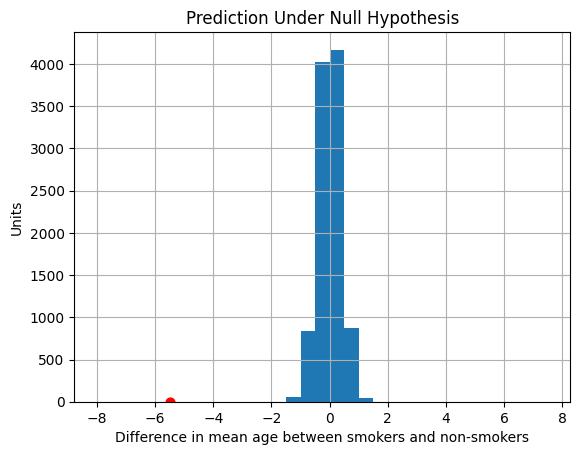

In [56]:
difference_df.hist(bins=np.arange(-8,8,0.5))
plt.scatter(observed_diff,0,color='red',s=40)
plt.title('Prediction Under Null Hypothesis')
plt.xlabel('Difference in mean age between smokers and non-smokers')
plt.ylabel('Units')
plt.show()

# Since the observed the difference is lying outside the range WE REJECT NULL HYPOTHESIS

In [57]:
p_val = np.count_nonzero(differences <= observed_diff)/10000
p_val

0.0

### Since the p value is less than 0.05 that is the critical level, we reject the null hypothesis

# PART 2

NULL HYPOTHESIS: percentages of blood
groups among a certain aboriginal population is different from that observed from among
the rest of the world population.<br> 
ALTERNALTE HYPOTHESIS: percentages of blood groups among a certain aboriginal population is NOT DIFFERENT  from that observed from among
the rest of the world population. 

Statistic to apply for this is Z Testing 

# Observed statistic


In [61]:
observed_statistic = np.array(list(z_statistics.values()))
observed_statistic

array([-5.6160689 , -0.85618504, -2.2179305 ,  5.45063975, 10.86377031])

{'O+': -5.616068899600277, 'A+': -0.8561850433314628, 'B+': -2.217930496267749, 'AB+': 5.450639749993621, 'Others': 10.863770311284387}


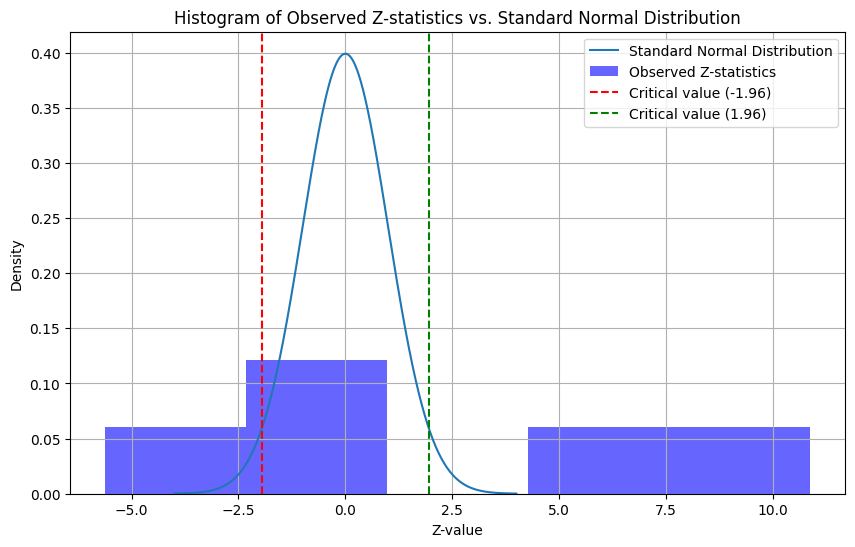

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

world_proportions = {
    "O+": 0.42,
    "A+": 0.31,
    "B+": 0.15,
    "AB+": 0.05,
    "Others": 0.07
}

aboriginal_proportions = {
    "O+": 0.35,
    "A+": 0.30,
    "B+": 0.13,
    "AB+": 0.08,
    "Others": 0.14
}

sample_size = 1568

def calculate_z_statistic(p_hat, p_0, n):
    numerator = p_hat - p_0
    denominator = math.sqrt(p_0 * (1 - p_0) / n)
    return numerator / denominator

z_statistics = {}

for blood_group, p_0 in world_proportions.items():
    p_hat = aboriginal_proportions[blood_group]
    z_stat = calculate_z_statistic(p_hat, p_0, sample_size)
    z_statistics[blood_group] = z_stat

print(z_statistics)


x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution")
plt.hist(list(z_statistics.values()), bins=5, density=True, alpha=0.6, color='blue', label="Observed Z-statistics")

plt.title("Histogram of Observed Z-statistics vs. Standard Normal Distribution")
plt.xlabel("Z-value")
plt.ylabel("Density")
plt.legend()
plt.axvline(x=-1.96, color='red', linestyle='--', label="Critical value (-1.96)")
plt.axvline(x=1.96, color='green', linestyle='--', label="Critical value (1.96)")
plt.legend()
plt.grid(True)
plt.show()